In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [4]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'D:\aa\working_results\Book3.CSV',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2017-10-17 10:00:00,110.75,234.67,82.22,101.55,1.06,27.12
2017-10-17 11:00:00,165.34,536.91,49.09,130.76,0.98,87.85
2017-10-17 12:00:00,130.91,555.58,43.34,129.64,0.53,79.69
2017-10-17 13:00:00,126.39,556.05,32.97,103.30,0.40,78.19
2017-10-17 14:00:00,131.90,504.41,42.27,94.55,0.17,72.72


In [5]:
df.tail()

,pm25,pm10,no2,so2,co,o3
Date,,,,,,
2022-12-16 08:00:00,51.14,207.80,63.70,11.43,1.00,7.86
2022-12-16 09:00:00,75.18,241.10,83.39,13.30,1.06,26.08
2022-12-16 10:00:00,62.42,219.90,64.22,14.29,0.88,43.84
2022-12-16 11:00:00,54.10,173.33,53.70,12.77,0.80,56.66
2022-12-16 12:00:00,33.23,133.40,51.72,30.68,0.89,37.06


<AxesSubplot:>

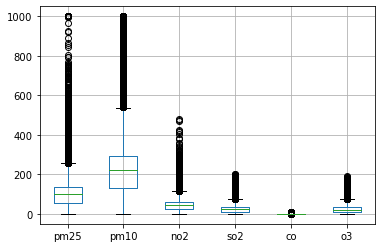

In [6]:
#Box plot
#pd.options.display.mpl_style = False
df.boxplot()

In [7]:
dataset_columns = df.columns.tolist()
dataset_columns

['pm25', 'pm10', 'no2', 'so2', 'co', 'o3']

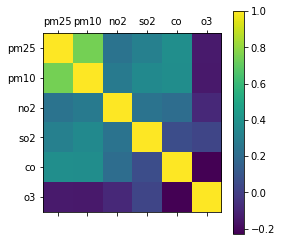

In [8]:
#Analysing relationship between different features
# cor_cols = ['pollution', 'wnd_spd', 'rain', 'snow', 'temp']
cor_cols = dataset_columns
plt.matshow(df.corr())
plt.xticks(range(len(cor_cols)), cor_cols)
plt.yticks(range(len(cor_cols)), cor_cols)
plt.colorbar()
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,11] = encoder.fit_transform(values[:,11])
values = values.astype('float32')
values[:11]

IndexError: index 11 is out of bounds for axis 1 with size 6

In [10]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [11]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (45263, 1)
X (45263, 4, 6)


In [13]:
#Splitting the dataset 12829*0.2=2565 => - 10264
#Splitting the dataset 12829*0.3=8981 => -8981
n_train = 2565
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (42698, 4, 6)
X_test (2565, 4, 6)
Y_train (42698, 1)
Y_test (2565, 1)


In [14]:

#Importing LSTM model
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
import tensorflow as tf
model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

#model.compile(optimizer = 'adam', loss = 'mean_squared_error')     
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='mean_squared_error', optimizer=opt)

In [15]:
history = model.fit(X_train, Y_train, epochs=50,
                    batch_size=64, validation_data=(X_test,Y_test),
                    verbose=2, shuffle=False)

Epoch 1/50
668/668 - 18s - loss: 0.0864 - val_loss: 0.0144 - 18s/epoch - 26ms/step
Epoch 2/50
668/668 - 11s - loss: 0.0164 - val_loss: 0.0658 - 11s/epoch - 17ms/step
Epoch 3/50
668/668 - 12s - loss: 0.0203 - val_loss: 0.0276 - 12s/epoch - 17ms/step
Epoch 4/50
668/668 - 10s - loss: 0.0194 - val_loss: 0.0191 - 10s/epoch - 16ms/step
Epoch 5/50
668/668 - 10s - loss: 0.0203 - val_loss: 0.0165 - 10s/epoch - 16ms/step
Epoch 6/50
668/668 - 10s - loss: 0.0213 - val_loss: 0.0263 - 10s/epoch - 16ms/step
Epoch 7/50
668/668 - 10s - loss: 0.0214 - val_loss: 0.0175 - 10s/epoch - 16ms/step
Epoch 8/50
668/668 - 10s - loss: 0.0211 - val_loss: 0.0189 - 10s/epoch - 16ms/step
Epoch 9/50
668/668 - 10s - loss: 0.0207 - val_loss: 0.0203 - 10s/epoch - 16ms/step
Epoch 10/50
668/668 - 10s - loss: 0.0201 - val_loss: 0.0146 - 10s/epoch - 16ms/step
Epoch 11/50
668/668 - 10s - loss: 0.0208 - val_loss: 0.0236 - 10s/epoch - 16ms/step
Epoch 12/50
668/668 - 10s - loss: 0.0200 - val_loss: 0.0215 - 10s/epoch - 16ms/step
E

In [16]:
#Taking predictions
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

81/81 [==============================] - 2s 5ms/step
0.019570470082303774
0.13989449625451236


In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(Y_test, Y_pred)
print('MAPE', mape)

MAPE 42.81669381078526


In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
r2

-0.7715536177970186

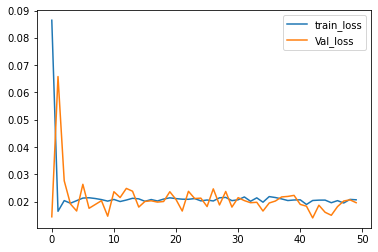

In [19]:
# plot history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()

In [20]:
me = np.mean(Y_pred - Y_test)
print('ME')
print(me)
mae = np.mean(np.abs(Y_pred - Y_test))    # MAE
print('MAE')
print(mae)
mpe = np.mean((Y_pred - Y_test)/Y_test)   # MPE
print('MPE')
print(mpe)
rmse = np.mean((Y_pred - Y_test)**2)**.5  # RMSE
print('RMSE')
print(rmse)
 

ME
-0.09232228272820034
MAE
0.09426716657688404
MPE
-0.3747211932316386
RMSE
0.13989449625451236
